In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [48]:
electricity = pd.read_csv('../../data/computation/electricity_end_use.csv')
electricity = electricity[electricity.Description == 'Electricity End Use, Total'] # we will look at total electricity end-use
electricity['YYYYMM'] = electricity['YYYYMM'].astype(str)
electricity['YYYY'] = electricity.YYYYMM.str[:4]
electricity['Value'] = electricity['Value'].astype(float)
electricity['annual end use'] = electricity.groupby('YYYY')['Value'].transform('sum')
electricity.drop_duplicates('YYYY', inplace=True)
electricity.reset_index()
electricity = electricity.drop('Column_Order', axis=1)
electricity = electricity.drop('MSN', axis=1)
electricity = electricity.drop('YYYYMM', axis=1)
# 2023 only has 11 months
electricity = electricity.drop(4784)
display(electricity)

,Value,Description,Unit,YYYY,annual end use
4110,254511.334,"Electricity End Use, Total",Million Kilowatthours,1949,254511.334
4111,291443.326,"Electricity End Use, Total",Million Kilowatthours,1950,291443.326
4112,330284.583,"Electricity End Use, Total",Million Kilowatthours,1951,330284.583
4113,356163.960,"Electricity End Use, Total",Million Kilowatthours,1952,356163.960
4114,396216.896,"Electricity End Use, Total",Million Kilowatthours,1953,396216.896
...,...,...,...,...,...
4719,356864.175,"Electricity End Use, Total",Million Kilowatthours,2018,8006177.987
4732,341137.223,"Electricity End Use, Total",Million Kilowatthours,2019,7908841.601
4745,328246.135,"Electricity End Use, Total",Million Kilowatthours,2020,7712754.043
4758,333976.530,"Electricity End Use, Total",Million Kilowatthours,2021,7889578.642


<AxesSubplot:xlabel='YYYY'>

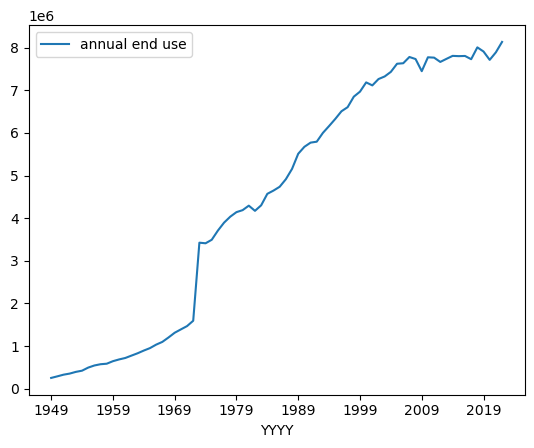

In [49]:
plt.plot(x='YYYY',y='annual end use')

In [63]:
compute = pd.read_csv('../../data/computation/systems_compute.csv')
compute = compute[['System','Training compute (FLOP)','Publication date']]
compute = compute.dropna()
compute.columns = [c.replace(' ', '_') for c in compute.columns]
compute.rename({'Training_compute_(FLOP)': 'Training_compute_FLOP'}, axis=1, inplace=True)
compute.Publication_date = pd.to_datetime(compute['Publication_date'], format='%Y-%m-%d')
display(compute)

,System,Training_compute_FLOP,Publication_date
3,KEPLER,124000000000000000000,2020-11-23
7,Wu Dao - Wen Yuan,650280960000000000000,2021-01-11
8,iGPT-L,8.91e+21,2020-06-17
9,VD-LSTM+REAL Large,21300000000000000,2016-11-04
19,GPT,17578125000000000000,2018-06-01
...,...,...,...
1395,Cerebras-GPT-13B,2.3e+22,2023-04-06
1399,GBERT-Large,2.24446464e+21,2020-10-21
1400,BERT-Large-CAS (PTB+WT2+WT103),521000000000000000000,2019-04-20
1402,ERNIE-Doc (247M),29100000000000000000,2020-12-31


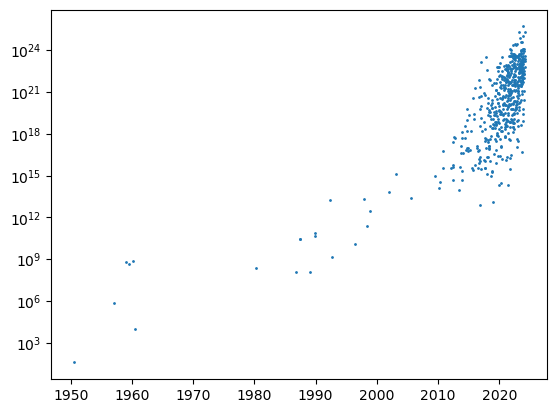

: 

In [71]:
compute['Training_compute_FLOP'] = compute['Training_compute_FLOP'].astype(float)
plt.yscale("log")
plt.scatter(compute['Publication_date'], compute['Training_compute_FLOP'], s=1)

In [40]:
data_cost = pd.read_csv('../../data/computation/memory_cost.csv')
# compute = compute.dropna()
# compute = compute.drop(compute.columns.difference(['System','Training compute (FLOP)','Publication date']), 1, inplace=True)
display(data_cost)

,Entity,Code,Year,memory,flash,disk_drives,ssd
0,World,OWID_WRL,1957,4.110418e+14,NaN,NaN,NaN
1,World,OWID_WRL,1959,6.794772e+13,NaN,7.600000e+09,NaN
2,World,OWID_WRL,1960,5.242880e+12,NaN,3.600000e+09,NaN
3,World,OWID_WRL,1965,2.642412e+12,NaN,NaN,NaN
4,World,OWID_WRL,1970,7.340030e+11,NaN,2.597000e+08,NaN
5,World,OWID_WRL,1973,3.993600e+11,NaN,NaN,NaN
6,World,OWID_WRL,1974,3.145730e+11,NaN,1.850000e+08,NaN
7,World,OWID_WRL,1975,4.992000e+10,NaN,NaN,NaN
8,World,OWID_WRL,1976,2.304000e+10,NaN,NaN,NaN
9,World,OWID_WRL,1978,1.520000e+10,NaN,NaN,NaN
